In [50]:
import dataretrieval.nwis as nwis
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import xrft

In [39]:
def drop_nan_var(ds,var):
    if ds[var].isnull().all():
        ds = ds.drop_vars(var)
    return ds

def var_to_float(ds,var):
    if var.startswith('p'):
        ds[var] = ds[var].to_series().apply(lambda x: pd.to_numeric(x, errors='coerce')).to_xarray()
    return ds

In [54]:
main = main = "C:\\Users\\andfa\\OneDrive\\Documents\\2024 Spring\\tidal_rivers\\"

# Station: OR1

In [41]:
or1_df = pd.read_excel(main+"OR1_WQ\\or1.xlsx",skiprows=965)

In [42]:
or1_df = or1_df.drop(0)

In [43]:
or1_df.sample_dt = pd.to_datetime(or1_df.sample_dt)

In [44]:
or1 = xr.Dataset.from_dataframe(or1_df)

In [45]:
for var in or1.data_vars:
    or1 = var_to_float(or1, var)
    or1 = drop_nan_var(or1, var)

In [46]:
or1 = or1.set_coords('sample_dt')
or1 = or1.swap_dims({'index':'sample_dt'})
or1 = or1.drop_vars('index')

In [47]:
or1

<xarray.Dataset>
Dimensions:                     (sample_dt: 567)
Coordinates:
  * sample_dt                   (sample_dt) datetime64[ns] 1990-11-20 ... 202...
Data variables: (12/88)
    agency_cd                   (sample_dt) object 'USGS' 'USGS' ... 'USGS'
    site_no                     (sample_dt) object 14246900 ... 14246900
    sample_tm                   (sample_dt) object 11:35:00 ... 12:50:00
    sample_end_dt               (sample_dt) datetime64[ns] NaT NaT ... NaT NaT
    sample_end_tm               (sample_dt) object nan nan nan ... nan nan nan
    sample_start_time_datum_cd  (sample_dt) object 'PST' 'PST' ... 'PST' 'PST'
    ...                          ...
    p70300                      (sample_dt) float64 93.0 79.0 81.0 ... nan nan
    p90095                      (sample_dt) float64 146.0 142.0 ... nan nan
    p80154                      (sample_dt) float64 12.0 13.0 35.0 ... nan nan
    p62854                      (sample_dt) float64 nan nan nan ... nan nan nan
    p50624                      (sample_dt) float64 nan nan nan ... nan nan nan
    p39086                      (sample_dt) float64 51.0 51.0 53.0 ... 48.0 nan

In [48]:
or1.sample_dt.attrs['Name'] = 'Date'
or1.sample_dt.attrs['Units'] = ''

or1.p00010.attrs['Name'] = 'Water Temperature'
or1.p00010.attrs['Units'] = '(deg C)'

or1.p00020.attrs['Name'] = 'Air Temperature'
or1.p00020.attrs['Units'] = '(deg C)'

or1.p00061.attrs['Name'] = 'Discharge, Instantaneous'
or1.p00061.attrs['Units'] = '(ft3/s)'

or1.p00065.attrs['Name'] = 'Gage Height'
or1.p00065.attrs['Units'] = '(ft)'

or1.p00076.attrs['Name'] = 'Turbidity'
or1.p00076.attrs['Units'] = ''

or1.p00095.attrs['Name'] = 'Specific Conductance'
or1.p00095.attrs['Units'] = '(microsiemens/cm @25C)'

or1.p00300.attrs['Name'] = 'Dissolved Oxygen'
or1.p00300.attrs['Units'] = '(mg/L)'

or1.p00301.attrs['Name'] = 'Dissolved Oxygen'
or1.p00301.attrs['Units'] = '(% saturation)'

or1.p00400.attrs['Name'] = 'pH (Field Measured)'
or1.p00400.attrs['Units'] = ''

or1.p00403.attrs['Name'] = 'pH (Lab Measured)'
or1.p00403.attrs['Units'] = ''

or1.p00405.attrs['Name'] = 'Carbon Dioxide'
or1.p00405.attrs['Units'] = '(mg/L)'

or1.p00600.attrs['Name'] = 'Total Nitrogen, Unfiltered'
or1.p00600.attrs['Units'] = '(mg/L)'

or1.p00602.attrs['Name'] = 'Total Nitrogen, Filtered'
or1.p00602.attrs['Units'] = '(mg/L)'

or1.p00631.attrs['Name'] = 'Nitrate + Nitrite'
or1.p00631.attrs['Units'] = '(mg/L as N)'

or1.p00665.attrs['Name'] = 'Phosphorus, Unfiltered'
or1.p00665.attrs['Units'] = '(mg/L as P)'

or1.p00666.attrs['Name'] = 'Phosphorus, Filtered'
or1.p00666.attrs['Units'] = '(mg/L as P)'

or1.p00915.attrs['Name'] = 'Calcium'
or1.p00915.attrs['Units'] = '(mg/L)'

or1.p00930.attrs['Name'] = 'Sodium'
or1.p00930.attrs['Units'] = '(mg/L)'

or1.p00945.attrs['Name'] = 'Sulfate'
or1.p00945.attrs['Units'] = '(mg/L)'

In [49]:
or1

<xarray.Dataset>
Dimensions:                     (sample_dt: 567)
Coordinates:
  * sample_dt                   (sample_dt) datetime64[ns] 1990-11-20 ... 202...
Data variables: (12/88)
    agency_cd                   (sample_dt) object 'USGS' 'USGS' ... 'USGS'
    site_no                     (sample_dt) object 14246900 ... 14246900
    sample_tm                   (sample_dt) object 11:35:00 ... 12:50:00
    sample_end_dt               (sample_dt) datetime64[ns] NaT NaT ... NaT NaT
    sample_end_tm               (sample_dt) object nan nan nan ... nan nan nan
    sample_start_time_datum_cd  (sample_dt) object 'PST' 'PST' ... 'PST' 'PST'
    ...                          ...
    p70300                      (sample_dt) float64 93.0 79.0 81.0 ... nan nan
    p90095                      (sample_dt) float64 146.0 142.0 ... nan nan
    p80154                      (sample_dt) float64 12.0 13.0 35.0 ... nan nan
    p62854                      (sample_dt) float64 nan nan nan ... nan nan nan
    p50624                      (sample_dt) float64 nan nan nan ... nan nan nan
    p39086                      (sample_dt) float64 51.0 51.0 53.0 ... 48.0 nan

In [50]:
#or1=or1.drop_vars(('sample_tm','sample_end_tm'))
#or1.to_netcdf(main+"OR1_WQ\\or1.nc")

(0.0, 100.0)

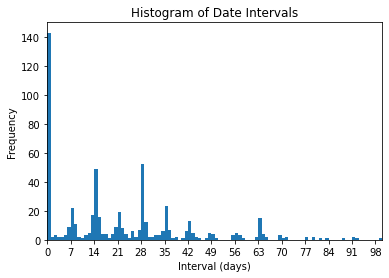

In [51]:
dates = or1['sample_dt'].values
intervals = np.diff(dates) / np.timedelta64(1, 'D')

bin_edges = np.arange(start=intervals.min(), stop=intervals.max() + 1, step=1)

plt.hist(intervals, bins=bin_edges)
plt.xlabel('Interval (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Date Intervals')
plt.xticks(ticks=np.arange(0,140,7),labels=np.arange(0,140,7))
plt.xlim(0,100)

In [52]:
var01 = 'p00010'
var02 = 'p00020'
var03 = 'p00061'
var04 = 'p00065'
var05 = 'p00076'
var06 = 'p00095'
var07 = 'p00300'
var08 = 'p00301'
var09 = 'p00400'
var10 = 'p00403'
var11 = 'p00405'
var12 = 'p00600'
var13 = 'p00602'
var14 = 'p00631'
var15 = 'p00665'
var16 = 'p00666'
var17 = 'p00915'
var18 = 'p00930'
var19 = 'p00945'

var_list = [var01,var02,var03,var04,var05,var06,var07,var08,var09,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19]

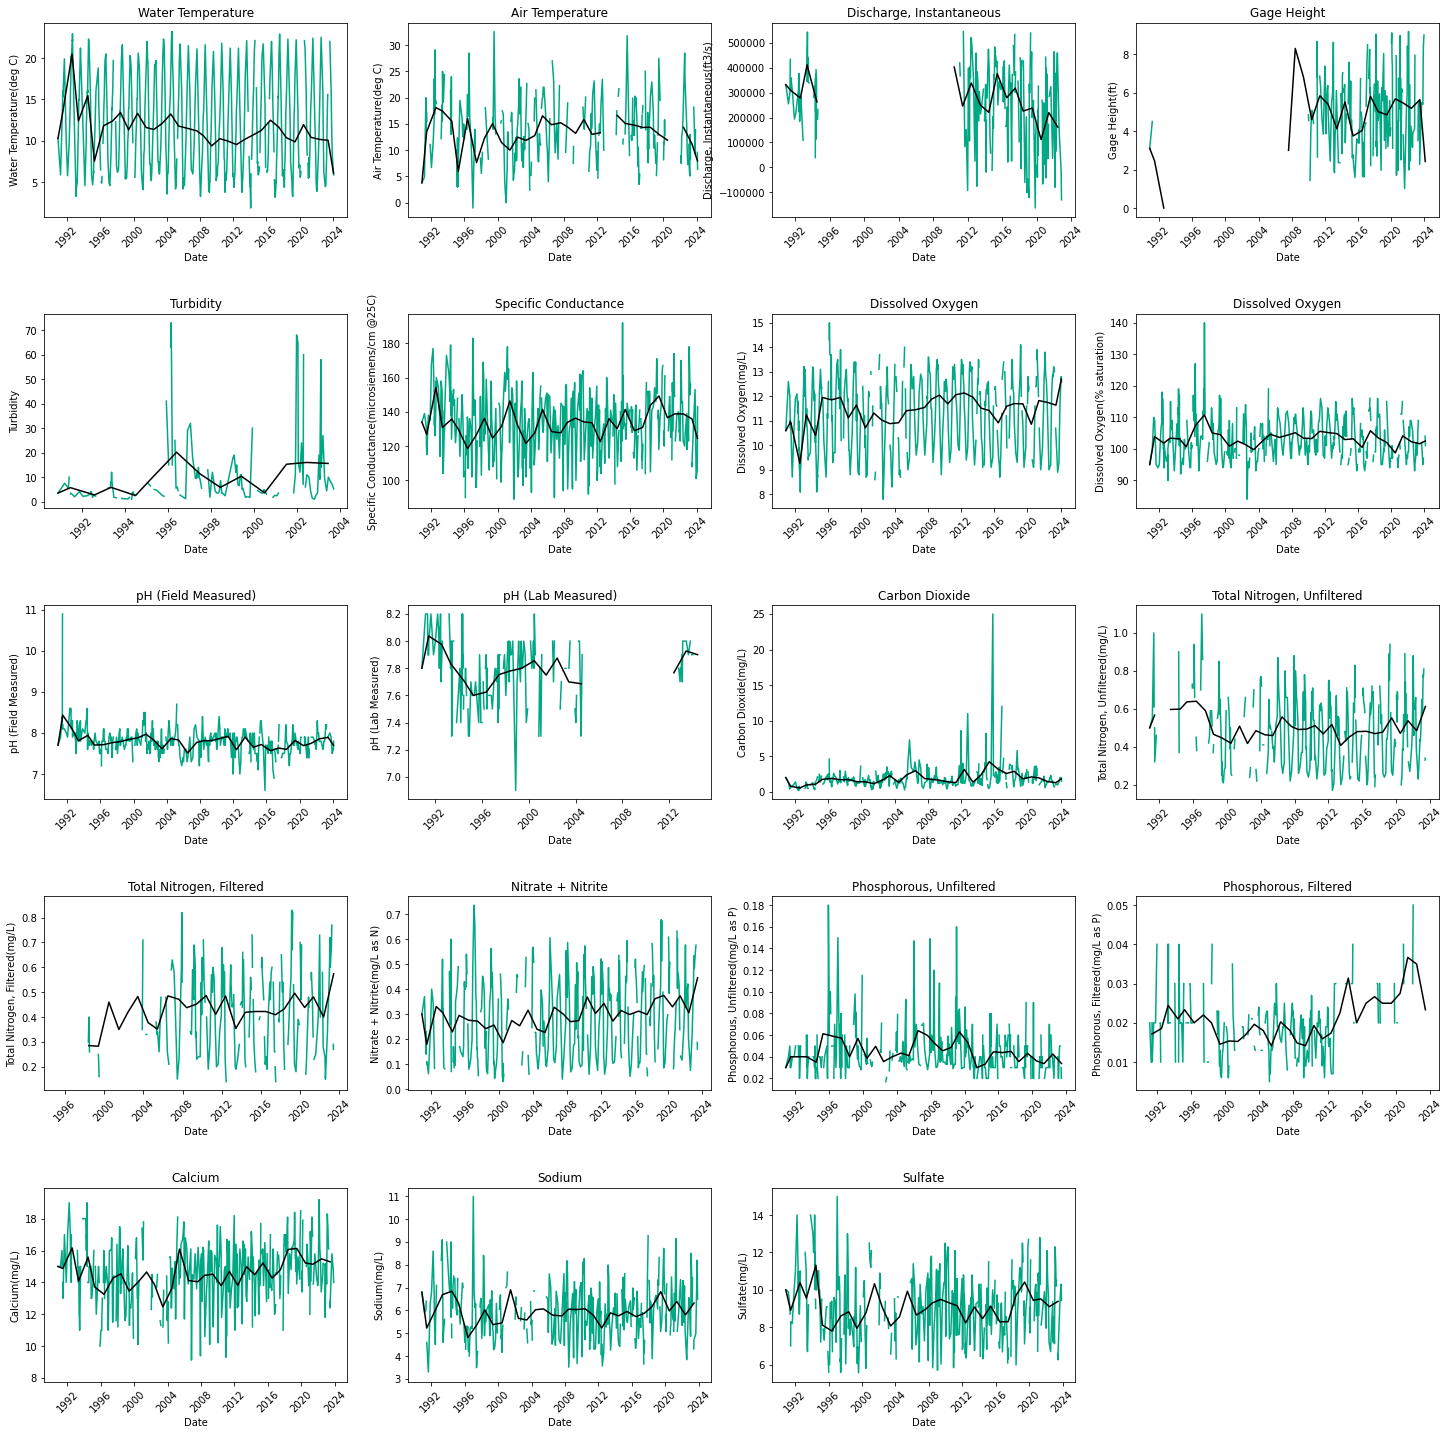

In [55]:
plt.figure(figsize=(25,25))

for n in range(1,20):
    plt.subplot(5,4,n)
    plt.plot(or1.sample_dt, or1[var_list[n-1]],color='#00A884')
    plt.plot(or1.sample_dt.resample(sample_dt='Y').mean(), or1[var_list[n-1]].resample(sample_dt='Y').mean(),color='k')
    plt.xlabel(or1.sample_dt.attrs['Name'])
    plt.ylabel(or1[var_list[n-1]].attrs['Name'] + or1[var_list[n-1]].attrs['Units'])
    plt.xticks(rotation=45)
    plt.title(or1[var_list[n-1]].attrs['Name'])
    
plt.subplots_adjust(hspace=0.5)
plt.savefig(main+"OR1_WQ\\all.png")

# Station: TX2 686

In [56]:
tx2_df = pd.read_excel(main+"TX2_WQ\\tx2.xlsx",skiprows=686)

In [57]:
tx2_df = tx2_df.drop(0)
tx2_df.sample_dt = pd.to_datetime(tx2_df.sample_dt)
tx2 = xr.Dataset.from_dataframe(tx2_df)

In [58]:
for var in tx2.data_vars:
    tx2 = var_to_float(tx2, var)
    tx2 = drop_nan_var(tx2, var)

In [59]:
tx2 = tx2.set_coords('sample_dt')
tx2 = tx2.swap_dims({'index':'sample_dt'})
tx2 = tx2.drop_vars('index')

In [60]:
tx2.sample_dt.attrs['Name']  = 'Date'
tx2.sample_dt.attrs['Units'] = ''

tx2.p00010.attrs['Name']  = 'Water Temperature'
tx2.p00010.attrs['Units'] = '(deg C)'

tx2.p00061.attrs['Name']  = 'Discharge, Instantaneous'
tx2.p00061.attrs['Units'] = '(ft3/s)'

tx2.p00095.attrs['Name']  = 'Specific Conductance'
tx2.p00095.attrs['Units'] = '(microsiemens/cm @25C)'

tx2.p00191.attrs['Name']  = 'Inorganics'
tx2.p00191.attrs['Units'] = '(mg/L)'

tx2.p00300.attrs['Name']  = 'Dissolved Oxygen'
tx2.p00300.attrs['Units'] = '(mg/L)'

tx2.p00301.attrs['Name']  = 'Dissolved Oxygen'
tx2.p00301.attrs['Units'] = '(% saturation)'

tx2.p00400.attrs['Name']  = 'pH (Field Measured)'
tx2.p00400.attrs['Units'] = ''

tx2.p00403.attrs['Name']  = 'pH (Lab Measured)'
tx2.p00403.attrs['Units'] = ''

tx2.p00602.attrs['Name']  = 'Total Nitrogen, Filtered'
tx2.p00602.attrs['Units'] = '(mg/L)'

tx2.p00613.attrs['Name']  = 'Nitrite'
tx2.p00613.attrs['Units'] = '(mg/L as N)'

tx2.p00618.attrs['Name']  = 'Nitrate'
tx2.p00618.attrs['Units'] = '(mg/L as N)'

tx2.p00623.attrs['Name']  = 'Ammonia + Organic Nitrogen'
tx2.p00623.attrs['Units'] = '(mg/L as N)'

tx2.p00631.attrs['Name']  = 'Nitrate + Nitrite'
tx2.p00631.attrs['Units'] = '(mg/L as N)'

tx2.p00660.attrs['Name']  = 'Orthophosphate'
tx2.p00660.attrs['Units'] = '(mg/L as PO4)'

tx2.p00666.attrs['Name']  = 'Phosphorus'
tx2.p00666.attrs['Units'] = '(mg/L as P)'

tx2.p00671.attrs['Name']  = 'Orthophosphate'
tx2.p00671.attrs['Units'] = '(mg/L as P)'

tx2.p00900.attrs['Name']  = 'Hardness'
tx2.p00900.attrs['Units'] = '(mg/L as CaCO3)'

tx2.p00904.attrs['Name']  = 'Noncarbonate Hardness'
tx2.p00904.attrs['Units'] = '(mg/L as CaCO3)'

tx2.p00915.attrs['Name']  = 'Calcium'
tx2.p00915.attrs['Units'] = '(mg/L)'

tx2.p00925.attrs['Name']  = 'Magnesium'
tx2.p00925.attrs['Units'] = '(mg/L)'

tx2.p00930.attrs['Name']  = 'Sodium'
tx2.p00930.attrs['Units'] = '(mg/L)'

tx2.p00931.attrs['Name']  = 'Sodium Adsorbtion Ratio'
tx2.p00931.attrs['Units'] = ''

tx2.p00932.attrs['Name']  = 'Sodium Fraction of Cations'
tx2.p00932.attrs['Units'] = '(% in equivalents of major cations)'

tx2.p00940.attrs['Name']  = 'Cloride'
tx2.p00940.attrs['Units'] = '(mg/L)'

tx2.p00945.attrs['Name']  = 'Sulfate'
tx2.p00945.attrs['Units'] = '(mg/L)'

tx2.p00950.attrs['Name']  = 'Floride'
tx2.p00950.attrs['Units'] = '(mg/L)'

tx2.p00955.attrs['Name']  = 'Silica'
tx2.p00955.attrs['Units'] = '(mg/L as Si)2'

In [61]:
#or1=or1.drop_vars(('sample_tm','sample_end_tm'))
#or1.to_netcdf(main+"TX2_WQ\\tx2.nc")

In [62]:
var01 = 'p00010'
var02 = 'p00061'
var03 = 'p00095'
var04 = 'p00191'
var05 = 'p00300'
var06 = 'p00301'
var07 = 'p00400'
var08 = 'p00403'
var09 = 'p00602'
var10 = 'p00613'
var11 = 'p00618'
var12 = 'p00623'
var13 = 'p00631'
var14 = 'p00660'
var15 = 'p00666'
var16 = 'p00671'
var17 = 'p00900'
var18 = 'p00904'
var19 = 'p00915'
var20 = 'p00925'
var21 = 'p00930'
var22 = 'p00931'
var23 = 'p00932'
var24 = 'p00940'
var25 = 'p00945'
var26 = 'p00950'
var27 = 'p00955'

var_list = [var01,var02,var03,var04,var05,var06,var07,var08,var09,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27]

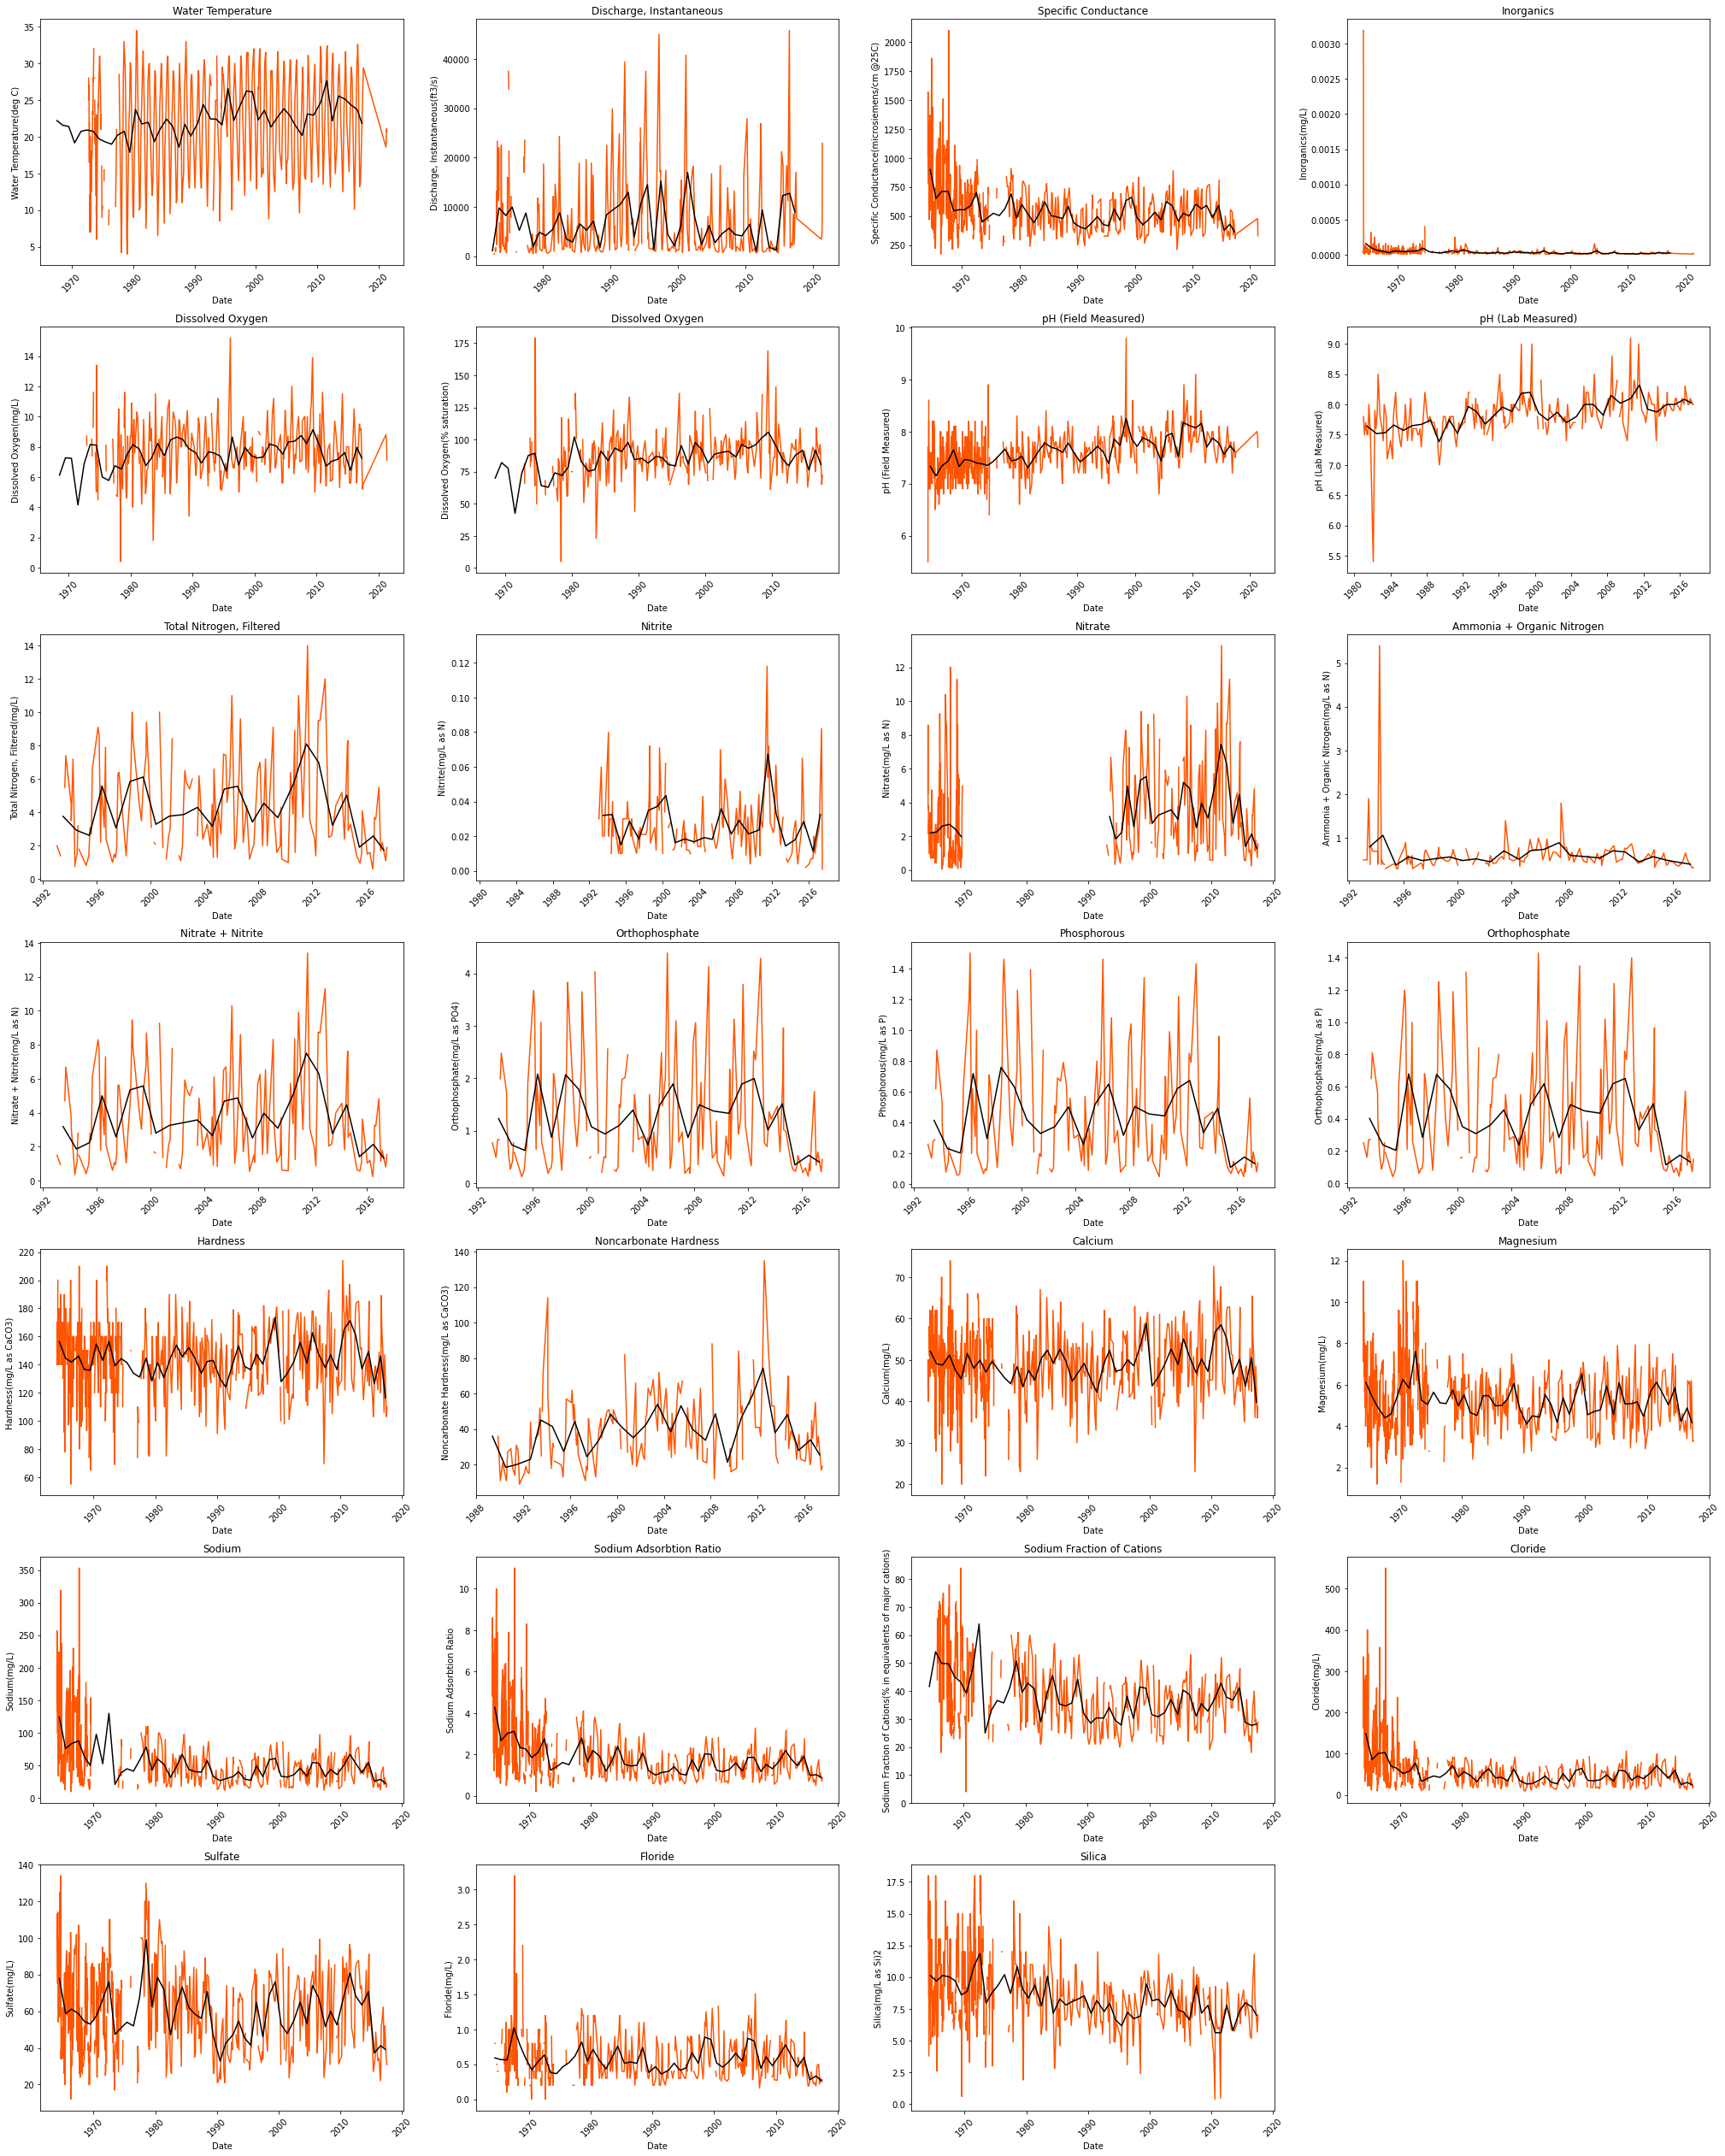

In [63]:
plt.figure(figsize=(35,45))

for n in range(1,28):
    plt.subplot(7,4,n)
    plt.plot(tx2.sample_dt, tx2[var_list[n-1]],color='#FF5500')
    plt.plot(tx2.sample_dt.resample(sample_dt='Y').mean(), tx2[var_list[n-1]].resample(sample_dt='Y').mean(),color='k')
    plt.xlabel(tx2.sample_dt.attrs['Name'])
    plt.ylabel(tx2[var_list[n-1]].attrs['Name'] + tx2[var_list[n-1]].attrs['Units'])
    plt.xticks(rotation=45)
    plt.title(tx2[var_list[n-1]].attrs['Name'])

plt.subplots_adjust(hspace=0.25)
plt.savefig(main+"TX2_WQ\\all.png")

# Station: PA4

In [64]:
pa4_df = pd.read_excel(main+"PA4_WQ\\pa4.xlsx",skiprows=1445)

In [65]:
pa4_df = pa4_df.drop(0)
pa4_df.sample_dt = pd.to_datetime(pa4_df.sample_dt)
pa4 = xr.Dataset.from_dataframe(pa4_df)

In [66]:
for var in pa4.data_vars:
    pa4 = var_to_float(pa4, var)
    pa4 = drop_nan_var(pa4, var)

In [67]:
pa4 = pa4.set_coords('sample_dt')
pa4 = pa4.swap_dims({'index':'sample_dt'})
pa4 = pa4.drop_vars('index')

In [68]:
pa4.sample_dt.attrs['Name']  = 'Date'
pa4.sample_dt.attrs['Units'] = ''

pa4.p00010.attrs['Name']  = 'Water Temperature'
pa4.p00010.attrs['Units'] = '(deg C)'

pa4.p00020.attrs['Name']  = 'Air Temperature'
pa4.p00020.attrs['Units'] = '(deg C)'

pa4.p00061.attrs['Name']  = 'Discharge, Instantaneous'
pa4.p00061.attrs['Units'] = '(ft3/s)'

pa4.p00065.attrs['Name']  = 'Gage Height'
pa4.p00065.attrs['Units'] = '(ft)'

pa4.p00095.attrs['Name']  = 'Specific Conductance'
pa4.p00095.attrs['Units'] = '(microsiemens/cm @25C)'

pa4.p00300.attrs['Name']  = 'Dissolved Oxygen'
pa4.p00300.attrs['Units'] = '(mg/L)'

pa4.p00301.attrs['Name']  = 'Dissolved Oxygen'
pa4.p00301.attrs['Units'] = '(% saturation)'

pa4.p00400.attrs['Name']  = 'pH (Field Measured)'
pa4.p00400.attrs['Units'] = ''

pa4.p00403.attrs['Name']  = 'pH (Lab Measured)'
pa4.p00403.attrs['Units'] = ''

pa4.p00600.attrs['Name']  = 'Total Nitrogen, Unfiltered'
pa4.p00600.attrs['Units'] = '(mg/L)'

pa4.p00602.attrs['Name']  = 'Total Nitrogen, Filtered'
pa4.p00602.attrs['Units'] = '(mg/L)'

pa4.p00605.attrs['Name']  = 'Organic Nitrogen, Unfiltered'
pa4.p00605.attrs['Units'] = '(mg/L as N)'

pa4.p00607.attrs['Name']  = 'Organic Nitrogen, Filtered'
pa4.p00607.attrs['Units'] = '(mg/L as N)'

pa4.p00608.attrs['Name']  = 'Ammonia, Filtered'
pa4.p00608.attrs['Units'] = '(mg/L as N)'

pa4.p00610.attrs['Name']  = 'Ammonia, Unfiltered'
pa4.p00610.attrs['Units'] = '(mg/L as N)'

pa4.p00613.attrs['Name']  = 'Nitrite'
pa4.p00613.attrs['Units'] = '(mg/L as N)'

pa4.p00618.attrs['Name']  = 'Nitrate'
pa4.p00618.attrs['Units'] = '(mg/L as N)'

pa4.p00623.attrs['Name']  = 'Ammonia + Organic Nitrogen, Filtered'
pa4.p00623.attrs['Units'] = '(mg/L as N)'

pa4.p00625.attrs['Name']  = 'Ammonia + Organic Nitrogen, Unfiltered'
pa4.p00625.attrs['Units'] = '(mg/L as N)'

pa4.p00631.attrs['Name']  = 'Nitrate + Nitrite'
pa4.p00631.attrs['Units'] = '(mg/L as N)'

pa4.p00660.attrs['Name']  = 'Orthophosphate'
pa4.p00660.attrs['Units'] = '(mg/L as PO4)'

pa4.p00665.attrs['Name']  = 'Phosphorus, Unfiltered'
pa4.p00665.attrs['Units'] = '(mg/L as P)'

pa4.p00666.attrs['Name']  = 'Phosphorous, Filtered'
pa4.p00666.attrs['Units'] = '(mg/L as P)'

pa4.p00671.attrs['Name']  = 'Orthophosphate'
pa4.p00671.attrs['Units'] = '(mg/L as P)'

pa4.p00680.attrs['Name']  = 'Organic Carbon, Unfiltered'
pa4.p00680.attrs['Units'] = '(mg/L)'

pa4.p00681.attrs['Name']  = 'Organic Carbon, Filtered'
pa4.p00681.attrs['Units'] = '(mg/L)'

pa4.p00688.attrs['Name']  = 'Inorganic Carbon, Suspended Sediment'
pa4.p00688.attrs['Units'] = '(mg/L)'

pa4.p00689.attrs['Name']  = 'Organic Carbon, Suspended Sediment'
pa4.p00689.attrs['Units'] = '(mg/L)'

pa4.p00694.attrs['Name']  = 'Total Carbon, Suspended Sediment'
pa4.p00694.attrs['Units'] = '(mg/L)'

pa4.p00900.attrs['Name']  = 'Hardness'
pa4.p00900.attrs['Units'] = '(mg/L as CaCO3)'

pa4.p00904.attrs['Name']  = 'Noncarbonate Hardness, Field'
pa4.p00904.attrs['Units'] = '(mg/L as CaCO3)'

pa4.p00905.attrs['Name']  = 'Noncarbonate Hardness, Lab'
pa4.p00905.attrs['Units'] = '(mg/L as CaCO3)'

pa4.p00915.attrs['Name']  = 'Calcium'
pa4.p00915.attrs['Units'] = '(mg/L)'

pa4.p00925.attrs['Name']  = 'Magnesium'
pa4.p00925.attrs['Units'] = '(mg/L)'

pa4.p00930.attrs['Name']  = 'Sodium'
pa4.p00930.attrs['Units'] = '(mg/L)'

pa4.p00931.attrs['Name']  = 'Sodium Adsorbtion Ratio'
pa4.p00931.attrs['Units'] = ''

pa4.p00932.attrs['Name']  = 'Sodium Fraction of Cations'
pa4.p00932.attrs['Units'] = '(% in equivalents of major cations)'

pa4.p00932.attrs['Name']  = 'Sodium Fraction of Cations'
pa4.p00932.attrs['Units'] = '(% in equivalents of major cations)'

pa4.p00935.attrs['Name']  = 'Potassium'
pa4.p00935.attrs['Units'] = '(mg/L)'

pa4.p00940.attrs['Name']  = 'Cloride'
pa4.p00940.attrs['Units'] = '(mg/L)'

pa4.p00945.attrs['Name']  = 'Sulfate'
pa4.p00945.attrs['Units'] = '(mg/L)'

pa4.p00950.attrs['Name']  = 'Floride'
pa4.p00950.attrs['Units'] = '(mg/L)'

pa4.p00955.attrs['Name']  = 'Silica'
pa4.p00955.attrs['Units'] = '(mg/L as Si)2'

In [69]:
#or1=or1.drop_vars(('sample_tm','sample_end_tm'))
#or1.to_netcdf(main+"PA4_WQ\\pa4.nc")

In [70]:
var01 = 'p00010'
var02 = 'p00061'
var03 = 'p00065'
var04 = 'p00095'
var05 = 'p00300'
var06 = 'p00301'
var07 = 'p00400'
var08 = 'p00600'
var09 = 'p00605'
var10 = 'p00613'
var11 = 'p00618'
var12 = 'p00623'
var13 = 'p00625'
var14 = 'p00631'
var15 = 'p00660'
var16 = 'p00665'
var17 = 'p00666'
var18 = 'p00671'
var19 = 'p00900'
var20 = 'p00915'
var21 = 'p00925'
var22 = 'p00930'
var23 = 'p00931'
var24 = 'p00932'
var25 = 'p00935'
var26 = 'p00940'
var27 = 'p00945'
var28 = 'p00955'

var_list = [var01,var02,var03,var04,var05,var06,var07,var08,var09,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28]

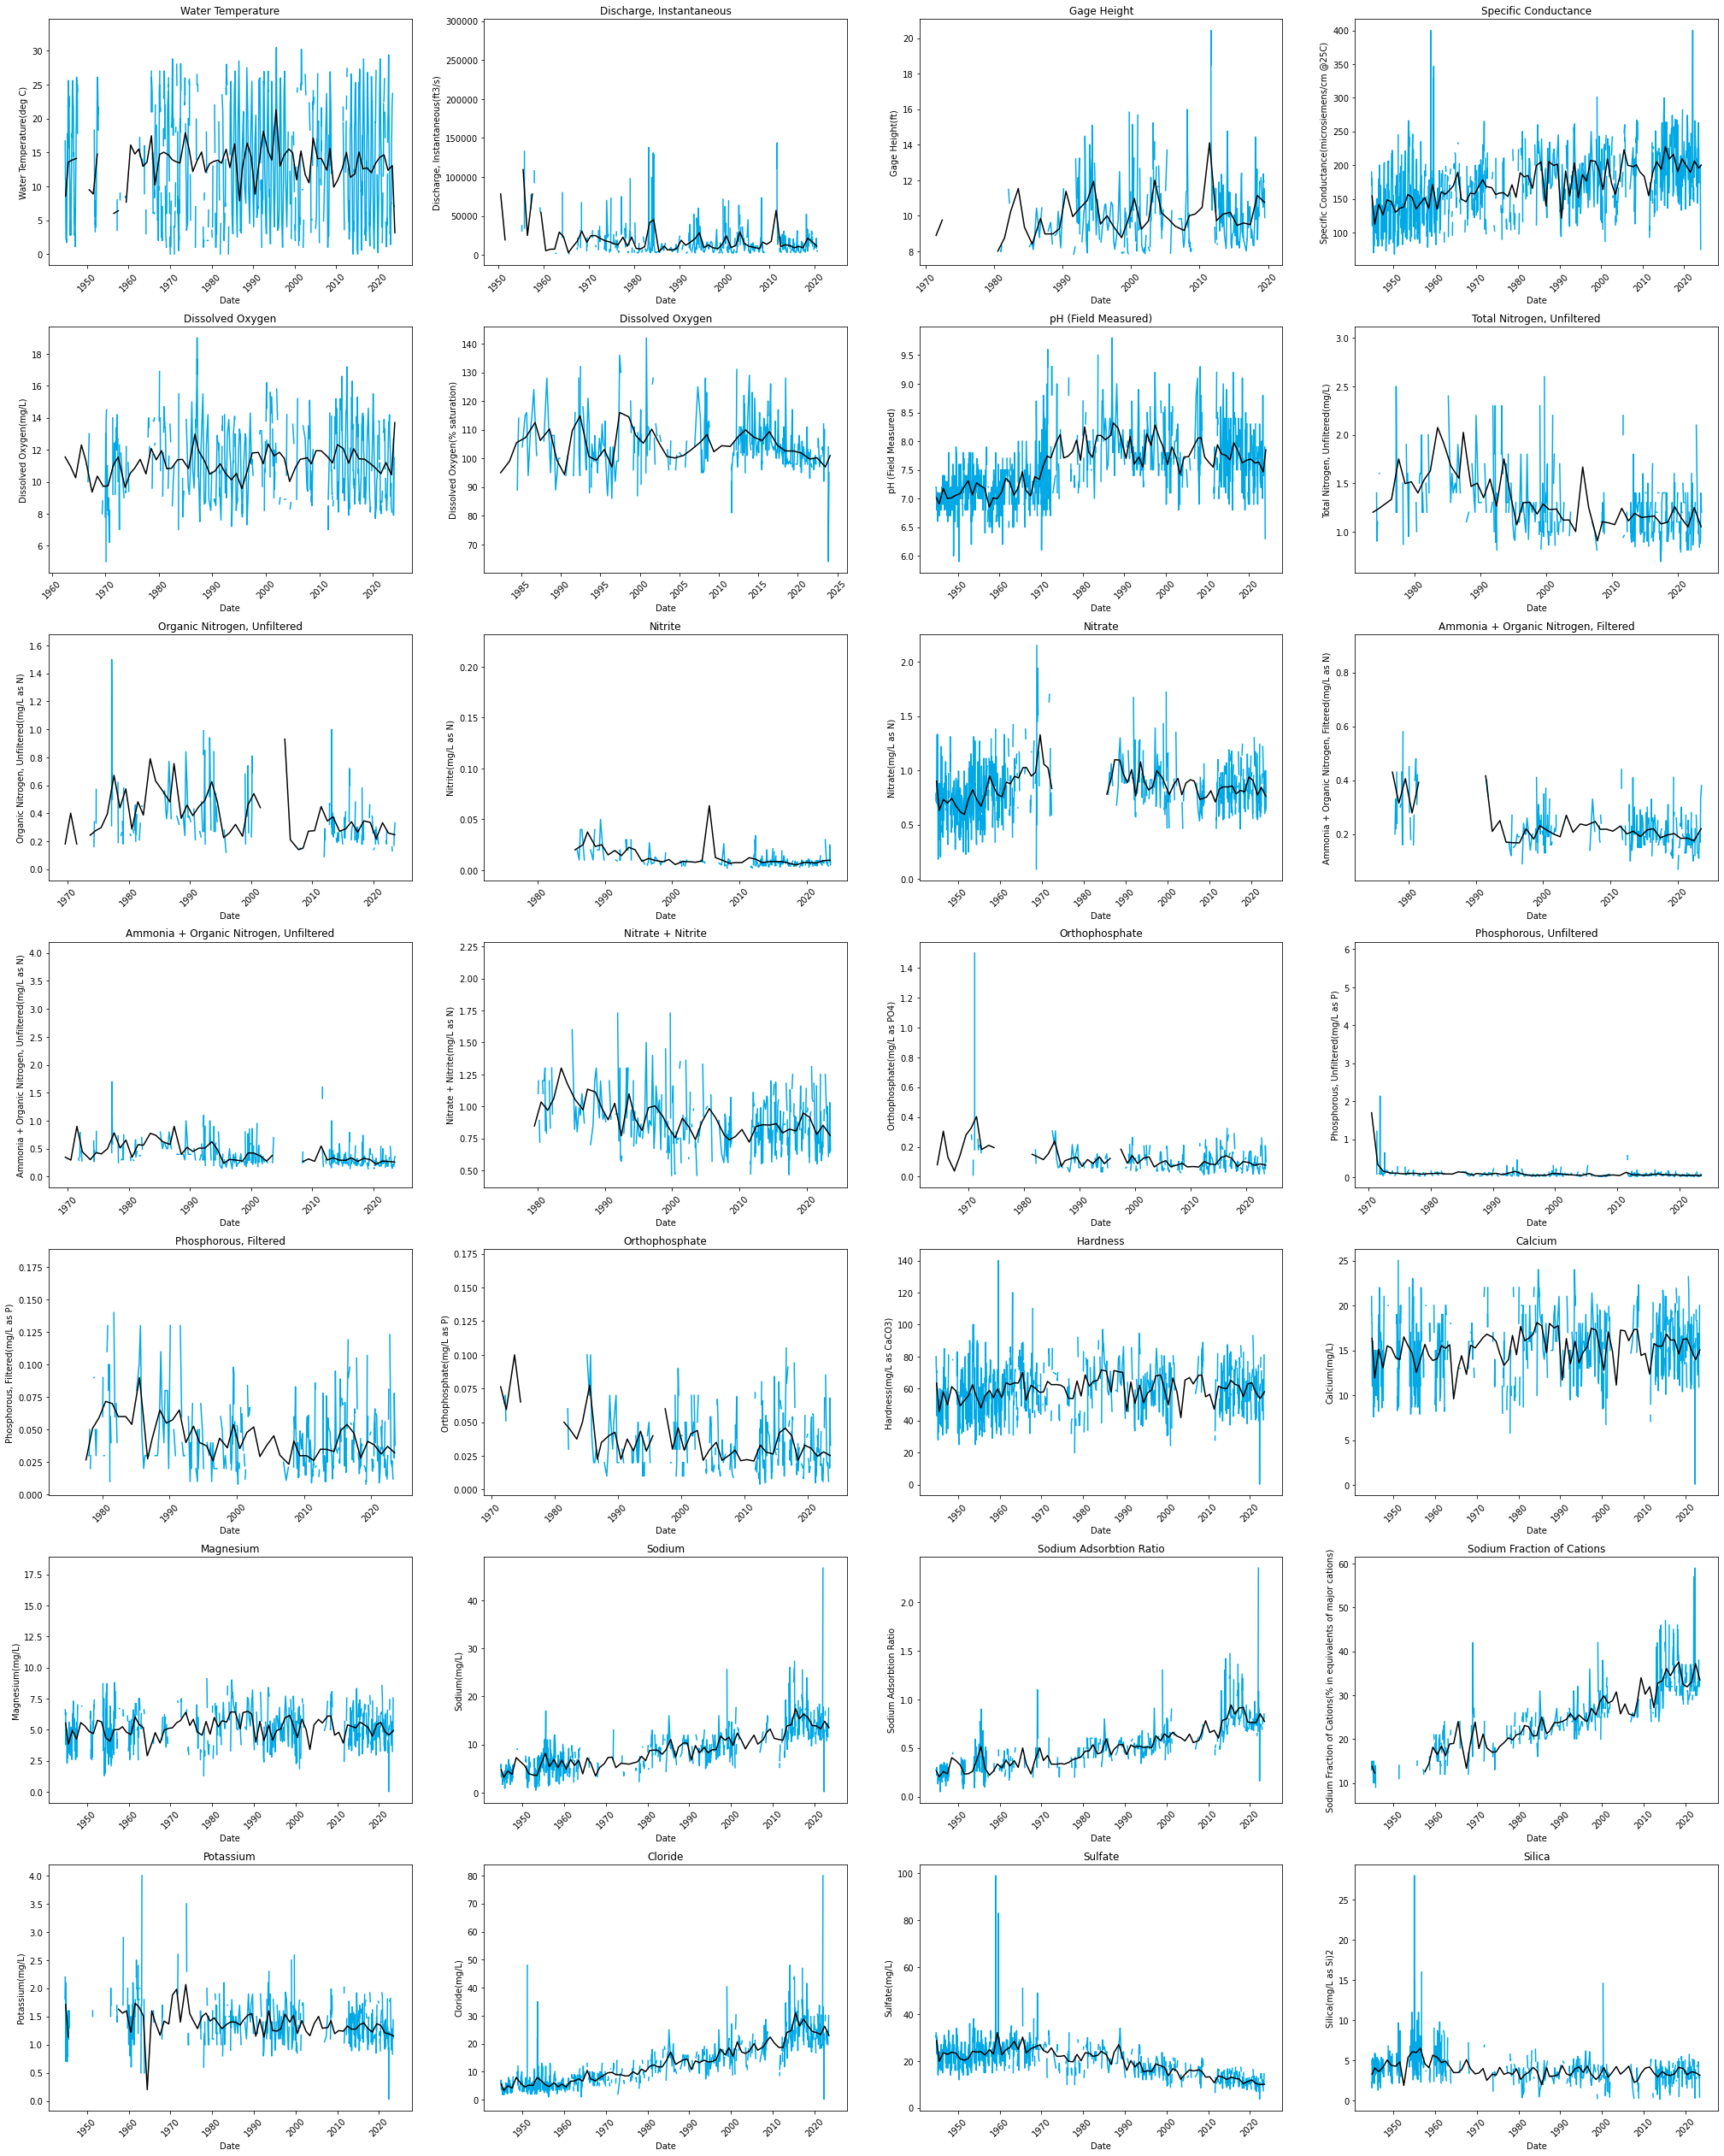

In [71]:
plt.figure(figsize=(35,45))

for n in range(1,29):
    plt.subplot(7,4,n)
    plt.plot(pa4.sample_dt, pa4[var_list[n-1]],color='#00A9E6')
    plt.plot(pa4.sample_dt.resample(sample_dt='Y').mean(), pa4[var_list[n-1]].resample(sample_dt='Y').mean(),color='k')
    plt.xlabel(pa4.sample_dt.attrs['Name'])
    plt.ylabel(pa4[var_list[n-1]].attrs['Name'] + pa4[var_list[n-1]].attrs['Units'])
    plt.xticks(rotation=45)
    plt.title(pa4[var_list[n-1]].attrs['Name'])

plt.subplots_adjust(hspace=0.25)
plt.savefig(main+"PA4_WQ\\all.png")

# Instantaneous Stations

In [245]:
siteID = '01462000'
parameterCode = '00065' 
startDate = '1900-01-01'
endDate = '2024-12-31'

iv_df = nwis.get_iv(sites=siteID, parameterCd=parameterCode, start=startDate, end=endDate)

In [246]:
iv_df = iv_df[0]
iv_df = iv_df.reset_index()
iv = xr.Dataset.from_dataframe(iv_df)

In [247]:
iv = iv.rename({'datetime':'sample_dt'})
iv = iv.rename({'00065':'p00065'})
iv = iv.rename({'00065_cd':'p00065_cd'})

In [248]:
iv = iv.set_coords('sample_dt')
iv = iv.swap_dims({'index':'sample_dt'})
iv = iv.drop_vars('index')

In [249]:
iv

<xarray.Dataset>
Dimensions:    (sample_dt: 542890)
Coordinates:
  * sample_dt  (sample_dt) object 2008-10-02T04:00:00+00:00 ... 2024-04-15T18...
Data variables:
    p00065     (sample_dt) float64 0.54 0.53 0.52 0.52 ... 4.94 4.95 4.94 4.94
    p00065_cd  (sample_dt) object 'A' 'A' 'A' 'A' 'A' ... 'P' 'P' 'P' 'P' 'P'
    site_no    (sample_dt) object '01462000' '01462000' ... '01462000'

In [250]:
sample_dt_series = pd.Series(iv['sample_dt'].values)
sample_dt_series = pd.to_datetime(sample_dt_series.dt.tz_convert(None))
sample_dt_series = sample_dt_series.reset_index(drop=True)
iv['sample_dt'] = sample_dt_series.to_xarray()

In [251]:
new_sample_dt = xr.DataArray(iv['sample_dt'].values, dims='sample_dt')

iv['sample_dt'] = new_sample_dt

In [252]:
iv

<xarray.Dataset>
Dimensions:    (sample_dt: 542890, index: 542890)
Coordinates:
  * sample_dt  (sample_dt) datetime64[ns] 2008-10-02T04:00:00 ... 2024-04-15T...
  * index      (index) int64 0 1 2 3 4 5 ... 542885 542886 542887 542888 542889
Data variables:
    p00065     (sample_dt) float64 0.54 0.53 0.52 0.52 ... 4.94 4.95 4.94 4.94
    p00065_cd  (sample_dt) object 'A' 'A' 'A' 'A' 'A' ... 'P' 'P' 'P' 'P' 'P'
    site_no    (sample_dt) object '01462000' '01462000' ... '01462000'

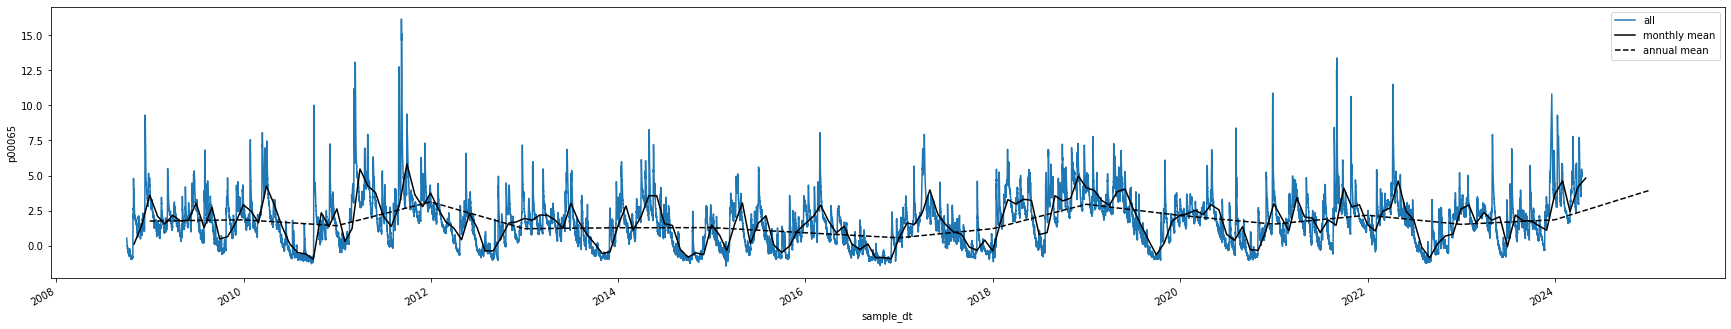

In [253]:
plt.figure(figsize=(30,5))
iv.p00065.plot(label='all')
iv.p00065.resample(sample_dt='M').mean().plot(color='k',label='monthly mean')
iv.p00065.resample(sample_dt='Y').mean().plot(color='k',linestyle='--',label='annual mean')
plt.legend()

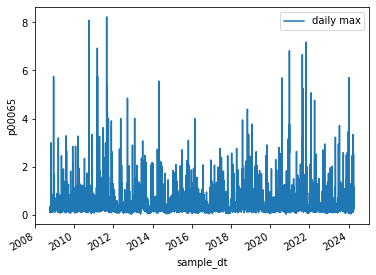

In [256]:
#plt.figure(figsize=(30,5))
(iv.p00065.resample(sample_dt='1D').max()-iv.p00065.resample(sample_dt='1D').min()).plot(label='daily max')
#iv.p00065.resample(sample_dt='1D').min().plot(label='daily min')
plt.legend()

# Load by Function

In [94]:
def load_iv_site (siteID, parameterCode='00065', startDate='1900-01-01', endDate='2024-12-31'):
    print('loading siteID:{}'.format(siteID))
    iv_df = nwis.get_iv(sites=siteID, parameterCd=parameterCode, start=startDate, end=endDate)
    print('data loaded')

    iv_df = iv_df[0]
    iv_df = iv_df.reset_index()
    iv = xr.Dataset.from_dataframe(iv_df)

    for var in iv.variables:
        if '00065' in var and 'cd' not in var:
            iv = iv.rename({var: 'p00065'})
    iv = iv.rename({'datetime':'sample_dt'})

    iv = iv.set_coords('sample_dt')
    iv = iv.swap_dims({'index':'sample_dt'})
    iv = iv.drop_vars('index')
    print('index updated')

    sample_dt_series = pd.Series(iv['sample_dt'].values)
    sample_dt_series = pd.to_datetime(sample_dt_series.dt.tz_convert(None))
    sample_dt_series = sample_dt_series.reset_index(drop=True)
    iv['sample_dt'] = sample_dt_series.to_xarray()

    new_sample_dt = xr.DataArray(iv['sample_dt'].values, dims='sample_dt')
    iv['sample_dt'] = new_sample_dt
    iv = iv.drop_vars('index')
    print('to datetime64 completed')
    
    iv.p00065.attrs['Name']  = 'Gage Height'
    iv.p00065.attrs['Units'] = '(ft)'
    
    iv.sample_dt.attrs['Name']  = 'Date'
    iv.sample_dt.attrs['Units'] = ''
    
    return iv

In [231]:
def get_anomaly_plot (iv):
    plt.figure(figsize=(30,30))
    (iv.p00065.resample(sample_dt='1D').max()-iv.p00065.resample(sample_dt='1D').min()).plot()
    plt.ylabel('Daily Height Anomaly (ft)')
    plt.title(iv.site_no.isel(sample_dt=0).values)

In [269]:
def tides_plot (iv,color='tab:blue'):
    plt.rcParams['font.size'] = 25
    plt.figure(figsize=(30,10))
    iv.p00065.plot(color=color)
    plt.xlabel(iv.sample_dt.attrs['Name'])
    plt.ylabel(iv.p00065.attrs['Name'] + iv.p00065.attrs['Units'])
    plt.title('Gage Height for Station {}'.format(iv.site_no.isel(sample_dt=0).values))

In [253]:
def spectral_plot (iv,color='tab:blue'):
    plt.figure(figsize=(15,10))
    plt.rcParams['font.size'] = 15
    new_time = pd.date_range(start=iv['sample_dt'].values.min(), end=iv['sample_dt'].values.max(), freq='5min')
    iv_new = iv.interp(sample_dt=new_time)

    wave_spec = xrft.power_spectrum(iv_new.p00065, window=True)
    wave_spec.plot(color=color)
    plt.vlines((1/(1*60*60)),10e-10,10e10,color='k',label='1hr')
    plt.vlines((1/(6*60*60)),10e-10,10e10,color='k',label='6hr',linestyle='--')
    plt.vlines((1/(12*60*60)),10e-10,10e10,color='k',label='12hr',linestyle='-.')
    plt.vlines((1/(24*60*60)),10e-10,10e10,color='k',label='24hr',linestyle='dotted')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Frequency (1/s)')
    plt.legend()
    plt.title('Spectra of Gage Height for Station {}'.format(iv.site_no.isel(sample_dt=0).values))

In [262]:
def multi_spectral_plot (iv,start,mid,end,color1='tab:blue',color2='tab:orange'):
    plt.figure(figsize=(15,10))
    plt.rcParams['font.size'] = 15
    mask1 = (iv['sample_dt'].dt.year >= start) & (iv['sample_dt'].dt.year < mid)
    iv['mask1'] = mask1
    mask2 = (iv['sample_dt'].dt.year >= mid) & (iv['sample_dt'].dt.year <= end)
    iv['mask2'] = mask2
    
    iv_older = iv.where(iv.mask1==True,drop=True)
    iv_newer = iv.where(iv.mask2==True,drop=True)
    
    colors=[color1,color2]
    labels=[(start,mid),(mid,end)]
    
    for n, iv in enumerate([iv_newer,iv_older]):
        new_time = pd.date_range(start=iv['sample_dt'].values.min(), end=iv['sample_dt'].values.max(), freq='5min')
        iv_new = iv.interp(sample_dt=new_time)

        wave_spec = xrft.power_spectrum(iv_new.p00065, window=True)
        wave_spec.plot(color=colors[n],label=labels[n])
        
    plt.vlines((1/(1*60*60)),10e-10,10e10,color='k',label='1hr')
    plt.vlines((1/(6*60*60)),10e-10,10e10,color='k',label='6hr',linestyle='--')
    plt.vlines((1/(12*60*60)),10e-10,10e10,color='k',label='12hr',linestyle='-.')
    plt.vlines((1/(24*60*60)),10e-10,10e10,color='k',label='24hr',linestyle='dotted')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Frequency (1/s)')
    plt.legend()
    plt.title('Spectra of Gage Height for Station {}'.format(iv.site_no.isel(sample_dt=0).values))

In [247]:
pa_iv1_ID = '01440200' #Deleware Water Gap Pa
pa_iv2_ID = '01457500' #Riegelsville NJ
pa_iv3_ID = '01464500' #Trenton NJ
pa_iv4_ID = '01465798' #Philadelphia PA

In [46]:
pa_iv1 = load_iv_site(pa_iv1_ID)
pa_iv2 = load_iv_site(pa_iv2_ID)
pa_iv3 = load_iv_site(pa_iv3_ID)
pa_iv4 = load_iv_site(pa_iv4_ID)

loading siteID:01440200
data loaded
index updated
to datetime64 completed
loading siteID:01457500
data loaded
index updated
to datetime64 completed
loading siteID:01464500
data loaded
index updated
to datetime64 completed
loading siteID:01465798
data loaded
index updated
to datetime64 completed


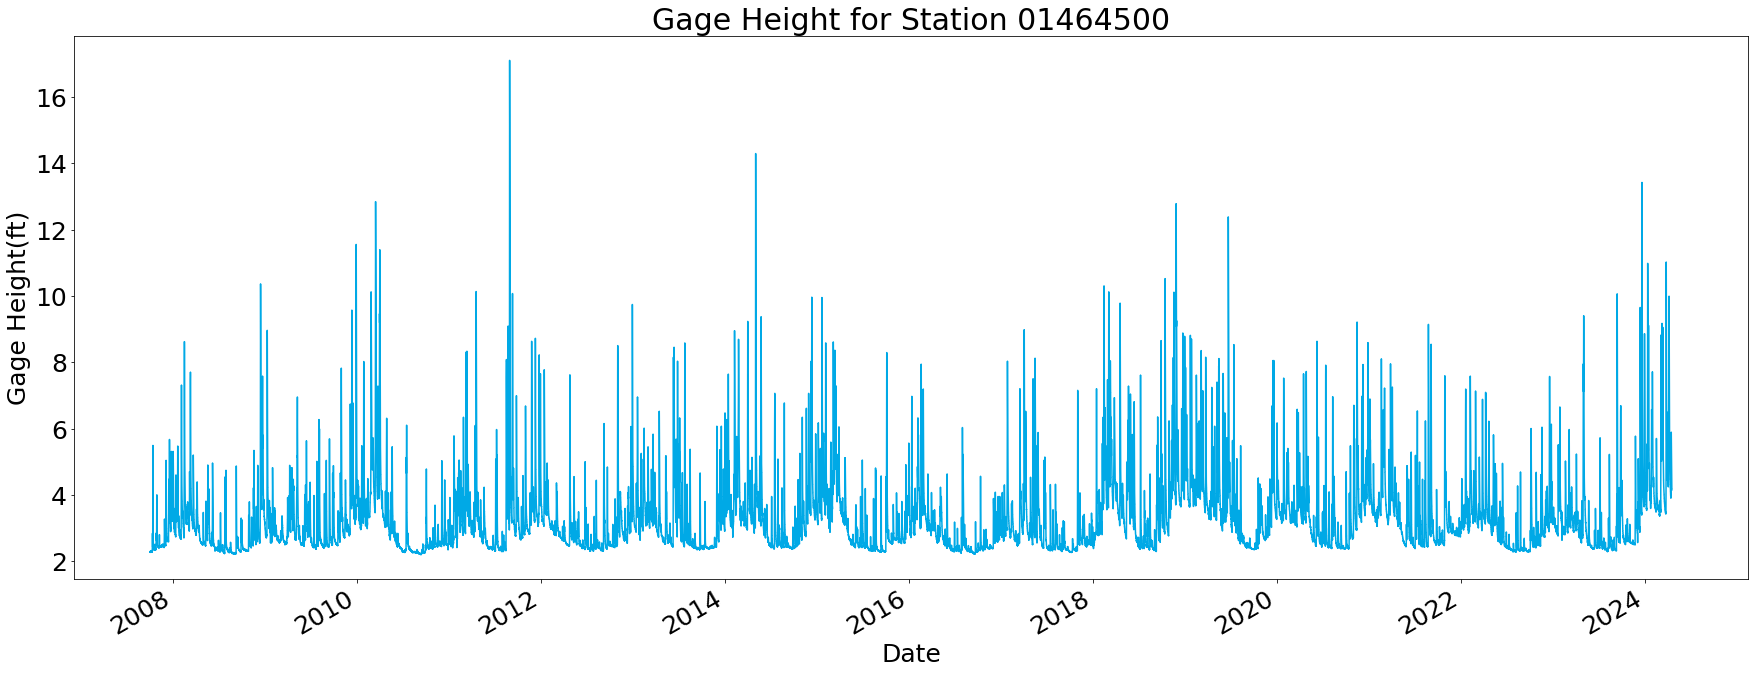

In [273]:
tides_plot(pa_iv3,color='#00A9E6')
plt.savefig(main+"tidal_extent\\PA_IV3_tides.png")

C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\andfa\anaconda3\lib\site-packages\xrft\xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


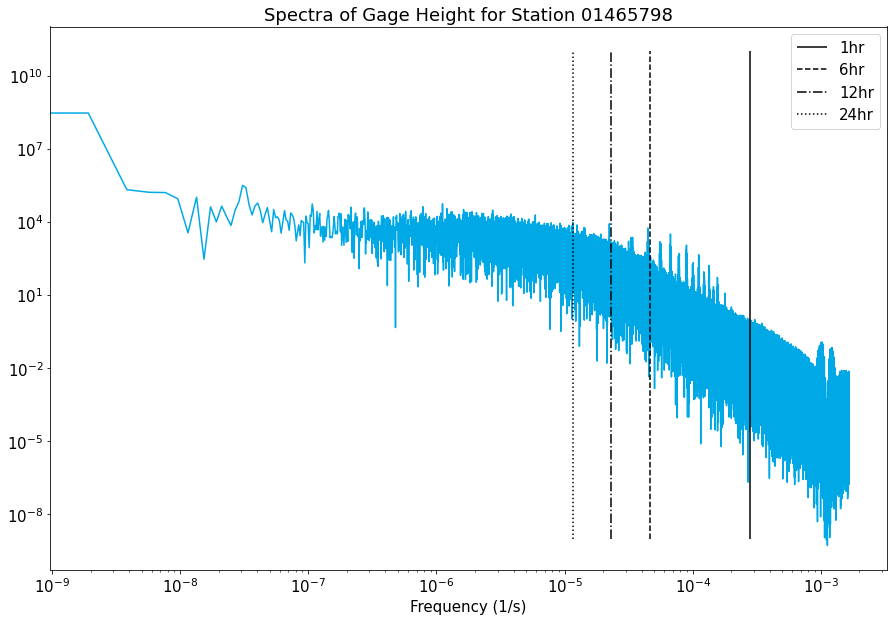

In [261]:
spectral_plot(pa_iv4,color='#00A9E6')
plt.savefig(main+"tidal_extent\\PA_IV4_spectra.png")

In [203]:
print(pa_iv4.sample_dt.dt.year.min().values,pa_iv4.sample_dt.dt.year.max().values)

2007 2024


C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\andfa\anaconda3\lib\site-packages\xrft\xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  i

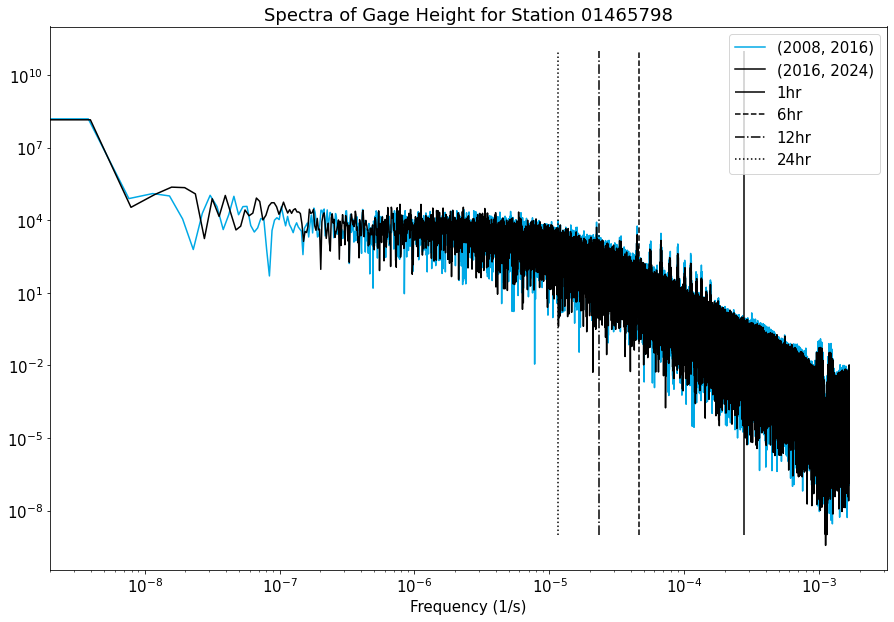

In [266]:
multi_spectral_plot(pa_iv4,2008,2016,2024,color1='#00A9E6',color2='k')
plt.savefig(main+"tidal_extent\\PA_IV4_multi_spec.png")

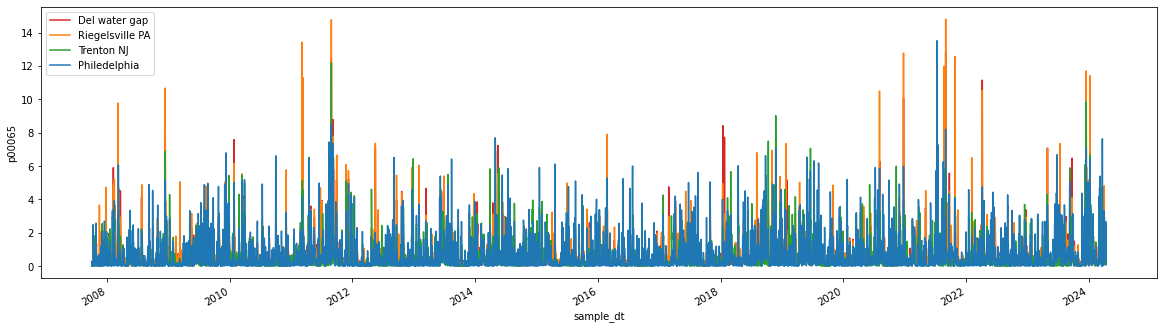

In [37]:
plt.figure(figsize=(20,5))
(pa_iv1.p00065.resample(sample_dt='1D').max()-pa_iv1.p00065.resample(sample_dt='1D').min()).plot(label='Del water gap',color='tab:red')
(pa_iv2.p00065.resample(sample_dt='1D').max()-pa_iv2.p00065.resample(sample_dt='1D').min()).plot(label='Riegelsville PA',color='tab:orange')
(pa_iv3.p00065.resample(sample_dt='1D').max()-pa_iv3.p00065.resample(sample_dt='1D').min()).plot(label='Trenton NJ',color='tab:green')
(pa_iv4.p00065.resample(sample_dt='1D').max()-pa_iv4.p00065.resample(sample_dt='1D').min()).plot(label='Philedelphia',color='tab:blue')
plt.legend()

In [69]:
tx_iv1_ID = '08066250'
tx_iv2_ID = '08066500'
tx_iv3_ID = '08067000'
tx_iv4_ID = '08067100'

In [70]:
tx_iv1 = load_iv_site(tx_iv1_ID)
tx_iv2 = load_iv_site(tx_iv2_ID)
tx_iv3 = load_iv_site(tx_iv3_ID)
tx_iv4 = load_iv_site(tx_iv4_ID)

loading siteID:08066250
data loaded
index updated
to datetime64 completed
loading siteID:08066500
data loaded
index updated
to datetime64 completed
loading siteID:08067000
data loaded
index updated
to datetime64 completed
loading siteID:08067100
data loaded
index updated
to datetime64 completed


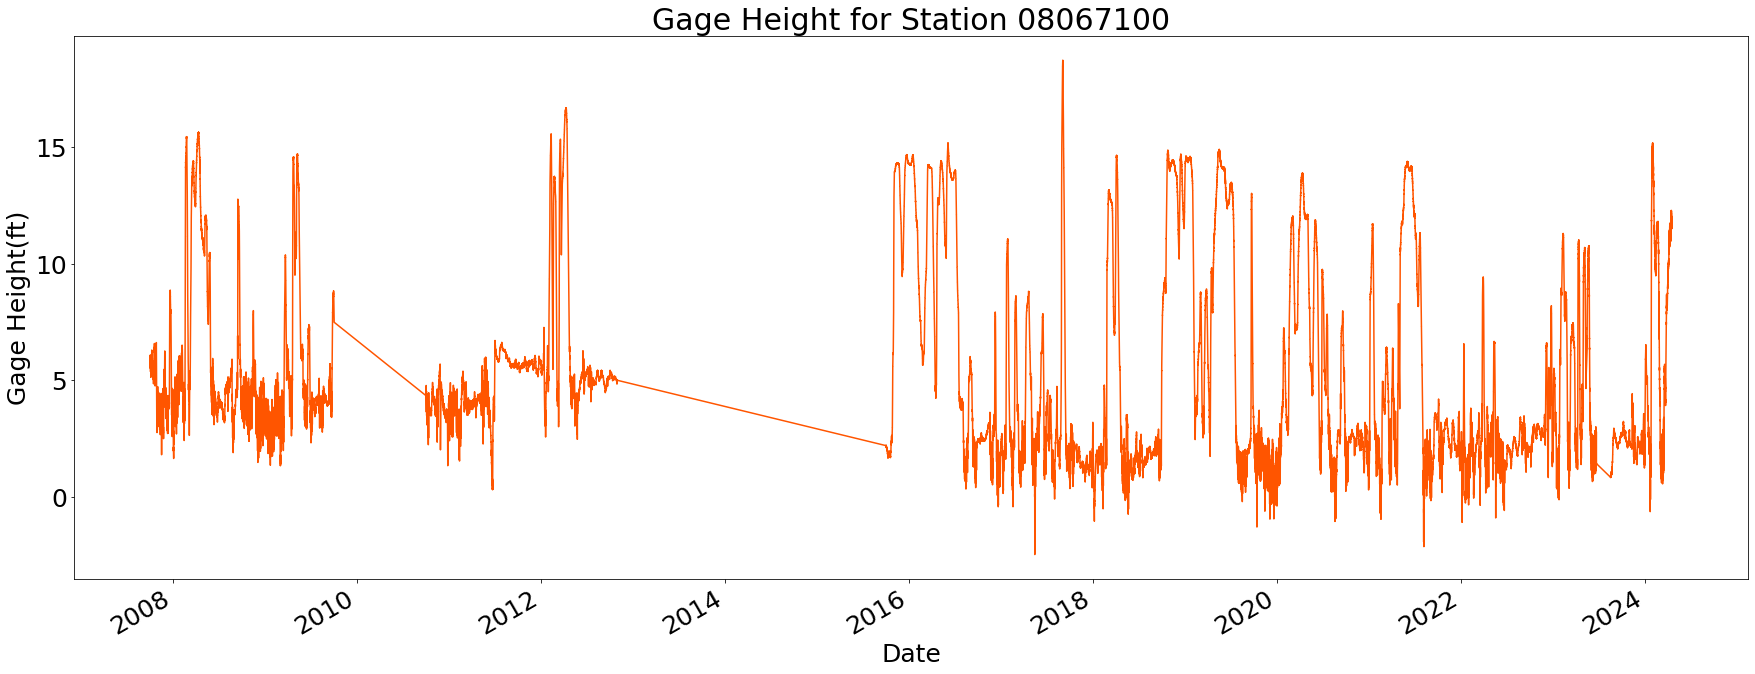

In [277]:
tides_plot(tx_iv4,color='#FF5500')
plt.savefig(main+"tidal_extent\\TX_IV4_tides.png")

C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\andfa\anaconda3\lib\site-packages\xrft\xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


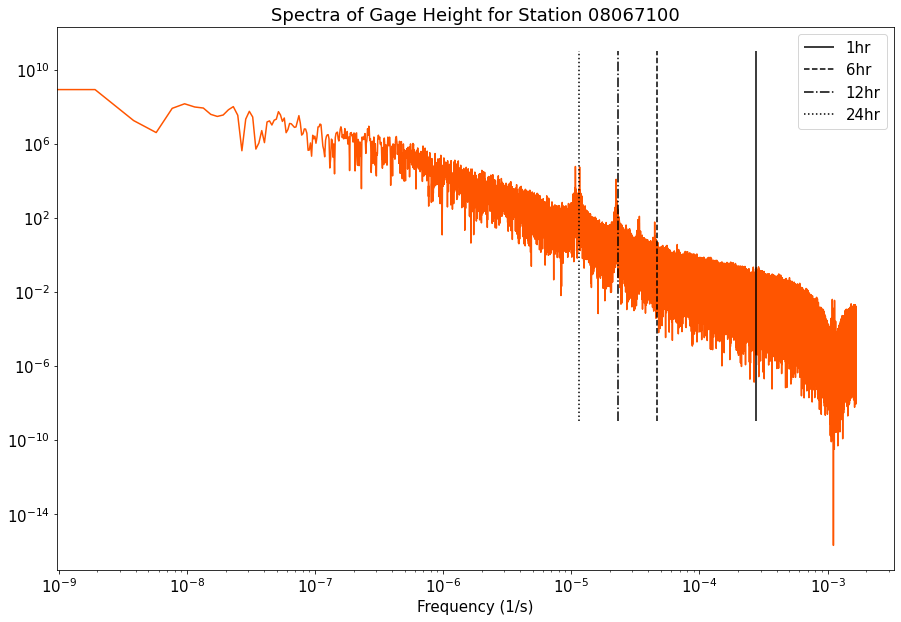

In [285]:
spectral_plot(tx_iv4,color='#FF5500')
plt.savefig(main+"tidal_extent\\TX_IV4_spectra.png")

In [218]:
print(tx_iv4.sample_dt.dt.year.min().values,tx_iv4.sample_dt.dt.year.max().values)

2007 2024


C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\andfa\anaconda3\lib\site-packages\xrft\xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  i

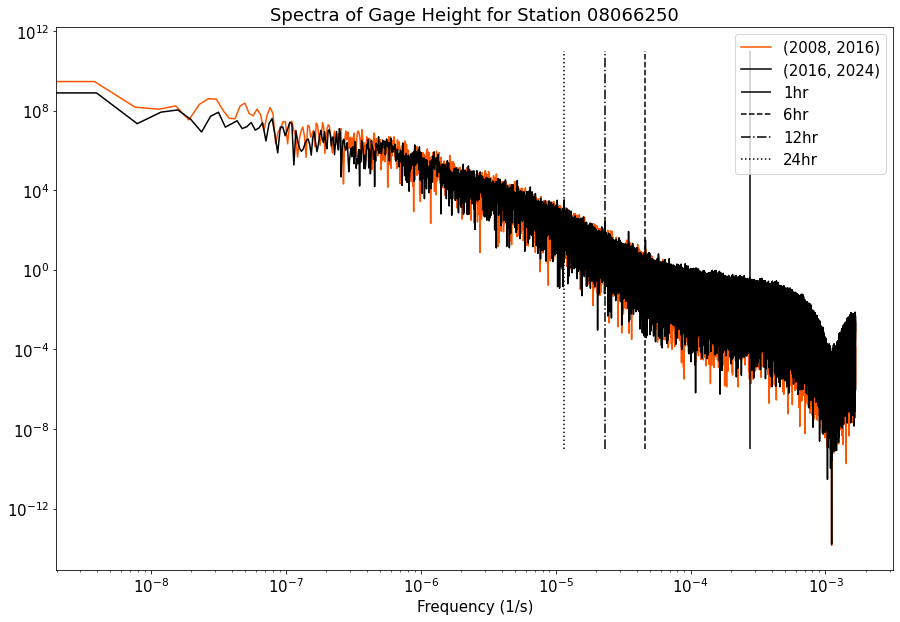

In [289]:
multi_spectral_plot(tx_iv1,2008,2016,2024,color1='#FF5500',color2='k')
plt.savefig(main+"tidal_extent\\TX_IV1_multi_spec.png")

In [83]:
or_iv1_ID = '14128870'
or_iv2_ID = '14211820'
or_iv3_ID = '14144700'
or_iv4_ID = '14211820'
or_iv5_ID = '14246900'

In [95]:
or_iv1 = load_iv_site(or_iv1_ID)
or_iv2 = load_iv_site(or_iv2_ID)
or_iv3 = load_iv_site(or_iv3_ID)
or_iv4 = load_iv_site(or_iv4_ID)
or_iv5 = load_iv_site(or_iv5_ID)

loading siteID:14128870
data loaded
index updated
to datetime64 completed
loading siteID:14211820
data loaded
index updated
to datetime64 completed
loading siteID:14144700
data loaded
index updated
to datetime64 completed
loading siteID:14211820
data loaded
index updated
to datetime64 completed
loading siteID:14246900
data loaded
index updated
to datetime64 completed


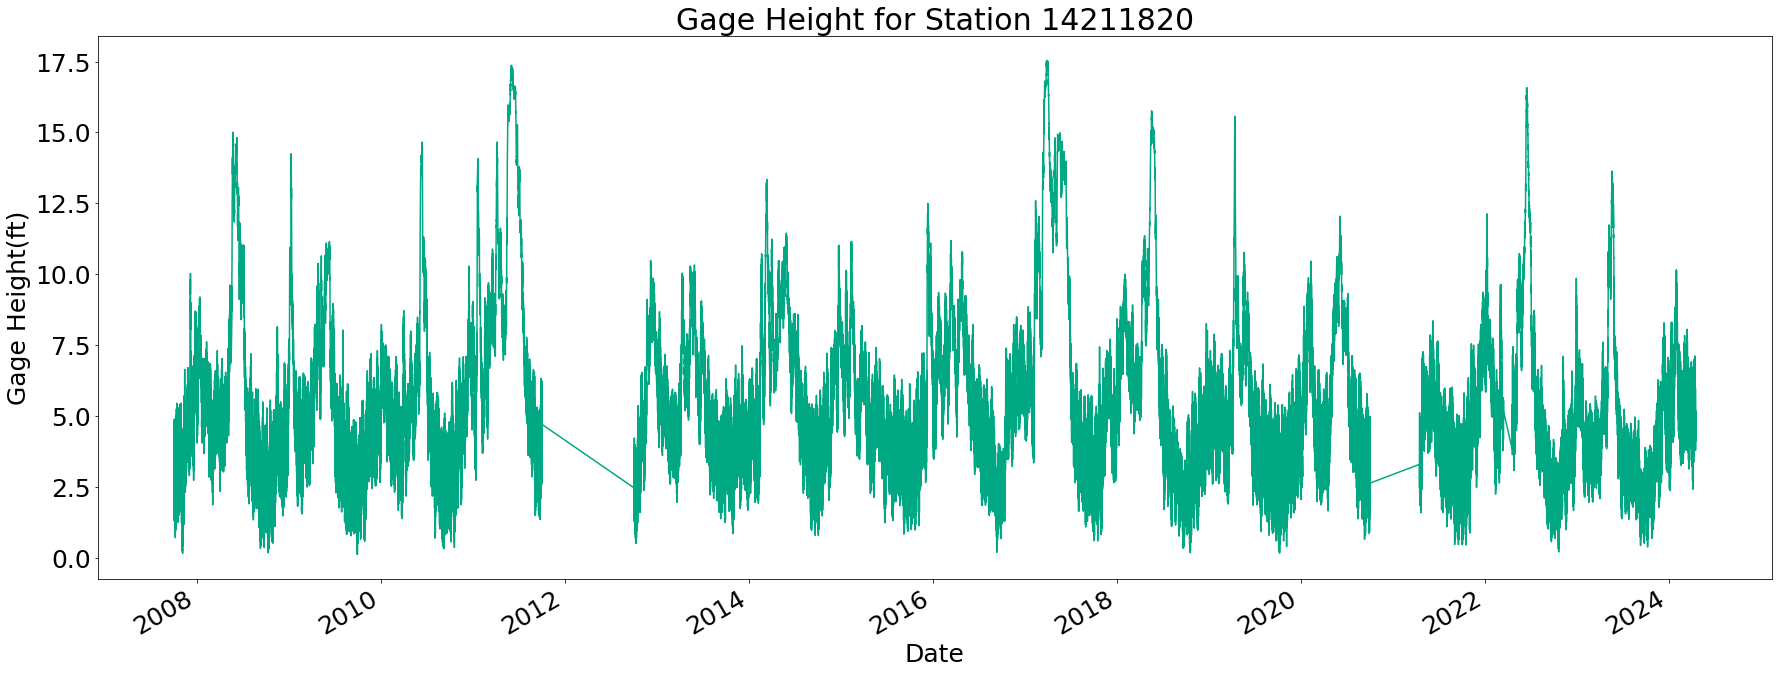

In [296]:
tides_plot(or_iv4,color='#00A884')
plt.savefig(main+"tidal_extent\\OR_IV4_tides.png")

C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\andfa\anaconda3\lib\site-packages\xrft\xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


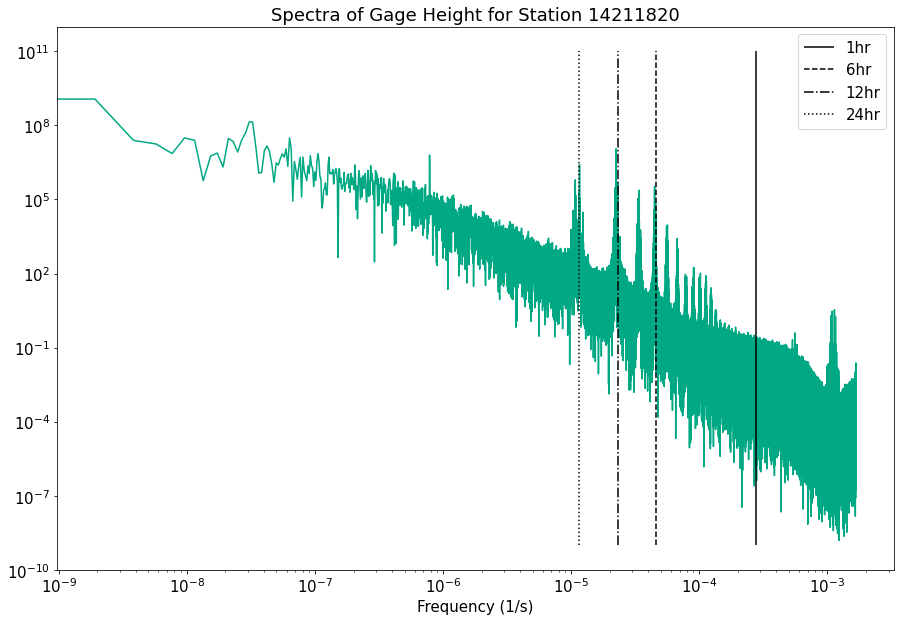

In [297]:
spectral_plot(or_iv4,color='#00A884')
plt.savefig(main+"tidal_extent\\OR_IV4_spectra.png")

In [223]:
print(or_iv5.sample_dt.dt.year.min().values,or_iv5.sample_dt.dt.year.max().values)

2015 2024


C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\andfa\anaconda3\lib\site-packages\xrft\xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
C:\Users\andfa\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  i

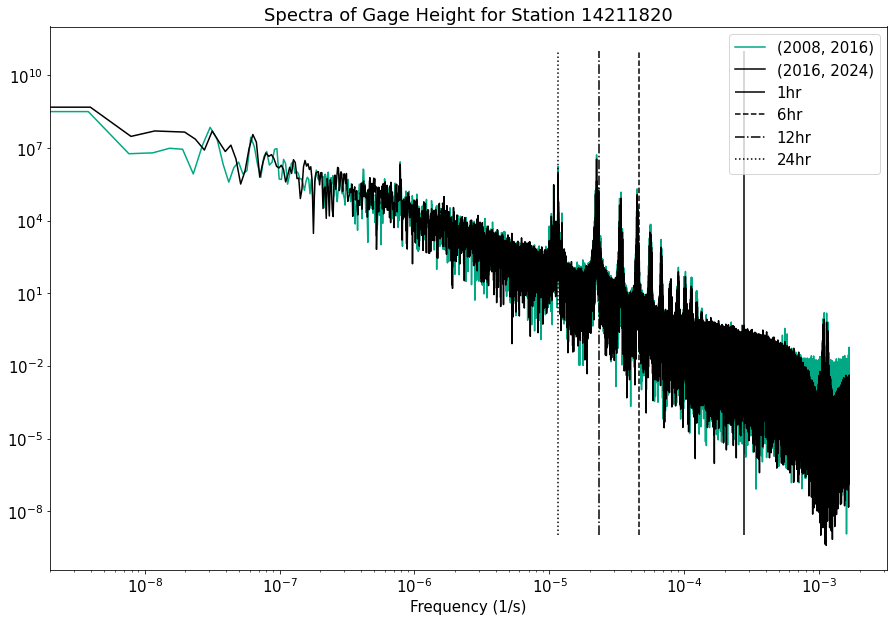

In [301]:
multi_spectral_plot(or_iv4,2008,2016,2024,color1='#00A884',color2='k')
plt.savefig(main+"tidal_extent\\OR_IV4_multi_spec.png")